# MACD strategy
As seen here: https://www.reddit.com/r/algotrading/comments/oe3cec/i_developed_a_simple_pine_script_strategy_for/

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [39]:
df = df[:]

In [40]:
exp1 = df.close.ewm(span=1200, adjust=False).mean()
exp2 = df.close.ewm(span=2600, adjust=False).mean()
df["macd"] = exp1-exp2
df["signal"] = df.macd.ewm(span=900, adjust=False).mean()

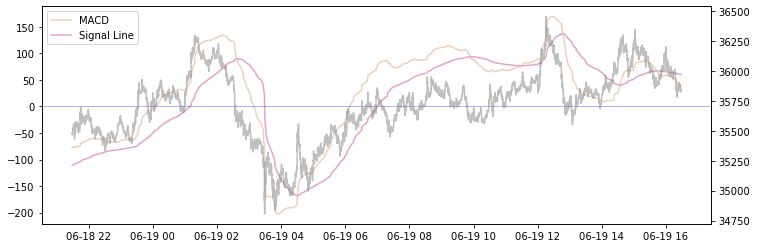

In [41]:
a = -10000
b = None

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df.macd[a:b], label='MACD', color = '#EBD2BE')
ax.plot(df.signal[a:b], label='Signal Line', color='#E5A4CB')
ax.axhline(linewidth=1, color='blue', alpha=.3)
ax1 = ax.twinx()
ax1.plot(df.close[a:b], color="gray", alpha=.5)

ax.legend(loc='upper left')


In [42]:
def get_macd_buy(df, x=-50):
    crit1 = df.macd.shift(1) < 0
    crit2 = df.macd > 0
    crit3 = df.signal.shift(1) < x
    return df.close[(crit1) & (crit2) & (crit3)]

def get_macd_sell(df, x=50):
    crit1 = df.macd.shift(1) > 0
    crit2 = df.macd < 0
    crit3 = df.signal > x
    return df.close[(crit1) & (crit2) & (crit3)]

up = get_macd_buy(df)
down = get_macd_sell(df)

In [43]:
side_up = pd.Series(-1, index=up.index)
side_down = pd.Series(1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()
side

time
2017-09-05 13:15:00.709    1
2017-09-28 07:31:26.044   -1
2017-10-25 12:13:53.653    1
2017-11-10 19:06:06.405    1
2017-11-15 10:53:33.762   -1
                          ..
2021-06-17 15:59:20.123   -1
2021-06-17 23:08:56.001   -1
2021-06-18 11:03:03.941   -1
2021-06-19 03:08:35.405    1
2021-06-19 06:08:48.758   -1
Length: 650, dtype: int64

In [44]:
side.to_csv("../data/side.csv")

## Plotting

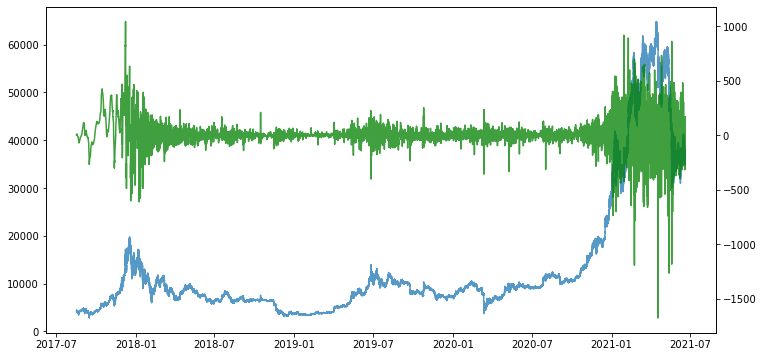

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.close, alpha=.75)
ax1 = ax.twinx()
ax1.plot(df.macd, color="green", alpha=.75)

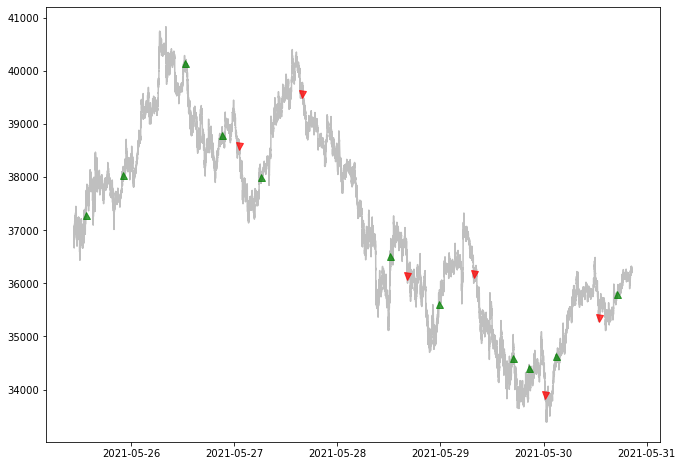

In [35]:
plot = df
plot["up"] = up
plot["down"] = down
plot = plot[-400_000:-300_000]

fig, ax = plt.subplots(figsize=(11,8))

# close_df.loc['2014':].plot(ax=ax, alpha=.5)
ax.plot(plot.close, alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r')


